In [39]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [40]:
# Load Dataset into the Data Frame
df = pd.read_csv('data.csv')

In [41]:
# Convert date column to datetime and extract year, month and day
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Data Preprocessing
cut_values = [['Oval', 'Emerald', 'Heart', 'Peer']]
cut_encoder = OrdinalEncoder(categories=cut_values)
df['Cut'] = cut_encoder.fit_transform(df[['Cut']])

color_values = [['Blue', 'Pink', 'Yellow', 'Gold', 'Purple', 'White', 'Red', 'Green', 'Brown']]
color_encoder = OrdinalEncoder(categories=color_values)
df['Color'] = color_encoder.fit_transform(df[['Color']])

clarity_values = [['Transparent', 'Translucent']]
clarity_encoder = OrdinalEncoder(categories=clarity_values)
df['Clarity'] = clarity_encoder.fit_transform(df[['Clarity']])

unique_categories = df['GemstoneName'].unique()
name_values = [list(unique_categories)]
name_encoder = OrdinalEncoder(categories=name_values)
df['GemstoneName'] = name_encoder.fit_transform(df[['GemstoneName']])


In [42]:
features = ["year", "month", "day", "GemstoneName", "Color", "Clarity", "Cut", "Weight"]
target = "Price"

X = df[features]
y = df[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Model Training
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=20, min_samples_split=2, max_features=6)
rf_reg.fit(X_train, y_train)

# Making predictions
rf_preds = rf_reg.predict(X_test)

In [49]:
# Score for Random Forest
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest R^2: {rf_r2}")

# Calculate RMSE
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

# Calculate MAE
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"Random Forest MAE: {rf_mae}")


Random Forest R^2: 0.9533638317563562
Random Forest RMSE: 15753.315537314053
Random Forest MAE: 7841.011631205673


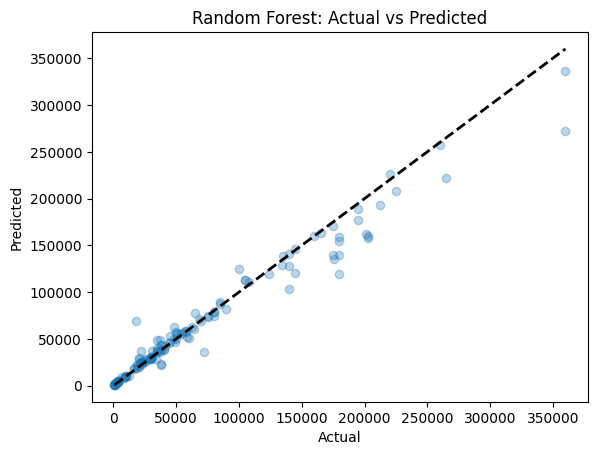

In [36]:
# Comparison of Actual Values and Predicted Values
plt.scatter(y_test, rf_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [38]:
import joblib

# Save the trained model to a file
model_filename = 'random_forest_model1.pkl'
joblib.dump(rf_reg, model_filename)

print(f"Random Forest model saved as {model_filename}")


Random Forest model saved as random_forest_model.pkl
